In [21]:
import pandas as pd
import re
import math
import numpy as np
import scipy
import os
import time
import seaborn as sns
from scipy.stats import binom, hypergeom
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [43]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [18]:
df = pd.read_csv('cab_rides.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
distance            693071 non-null float64
cab_type            693071 non-null object
time_stamp          693071 non-null int64
destination         693071 non-null object
source              693071 non-null object
price               637976 non-null float64
surge_multiplier    693071 non-null float64
id                  693071 non-null object
product_id          693071 non-null object
name                693071 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [5]:
df.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [26]:
df['date_time'] = pd.to_datetime(df['time_stamp']/1000, unit='s')
df.date_time

0        2018-12-16 09:30:07.890000105
1        2018-11-27 02:00:23.677000046
2        2018-11-28 01:00:22.197999954
3        2018-11-30 04:53:02.749000072
4        2018-11-29 03:49:20.223000050
5        2018-12-17 18:25:12.138000011
6        2018-11-26 05:03:00.200000048
7        2018-12-02 19:53:04.677000046
8        2018-12-03 06:28:02.644999981
9        2018-11-27 10:45:22.249000072
10       2018-11-30 16:13:03.881999969
11       2018-11-28 19:23:07.778000116
12       2018-11-30 22:13:01.178999901
13       2018-12-13 10:50:11.013999939
14       2018-12-13 19:15:03.934999943
15       2018-12-16 23:55:11.430000067
16       2018-12-14 00:40:07.960999966
17       2018-11-29 19:18:00.802000046
18       2018-12-01 14:13:04.210999966
19       2018-12-16 06:15:11.552999973
20       2018-11-27 19:18:22.540999889
21       2018-12-18 11:35:05.654000044
22       2018-11-30 02:28:04.042000055
23       2018-12-16 16:40:06.463000059
24       2018-11-26 07:46:11.798000097
25       2018-12-17 20:40

In [413]:
df['day']=df.time_stamp.apply(lambda x: time.strftime('%a', time.localtime(x/1000)))


In [418]:
df['AMPM']=df.time_stamp.apply(lambda x: time.strftime('%p', time.localtime(x/1000)))


In [412]:
df[df.time_stamp.apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x/1000)))


0         2018-12-16 04:30:07
1         2018-11-26 21:00:23
2         2018-11-27 20:00:22
3         2018-11-29 23:53:02
4         2018-11-28 22:49:20
5         2018-12-17 13:25:12
6         2018-11-26 00:03:00
7         2018-12-02 14:53:04
8         2018-12-03 01:28:02
9         2018-11-27 05:45:22
10        2018-11-30 11:13:03
11        2018-11-28 14:23:07
12        2018-11-30 17:13:01
13        2018-12-13 05:50:11
14        2018-12-13 14:15:03
15        2018-12-16 18:55:11
16        2018-12-13 19:40:07
17        2018-11-29 14:18:00
18        2018-12-01 09:13:04
19        2018-12-16 01:15:11
20        2018-11-27 14:18:22
21        2018-12-18 06:35:05
22        2018-11-29 21:28:04
23        2018-12-16 11:40:06
24        2018-11-26 02:46:11
25        2018-12-17 15:40:09
26        2018-12-15 22:40:13
27        2018-11-27 08:21:22
28        2018-12-13 05:40:11
29        2018-12-17 17:25:12
                 ...         
693041    2018-11-28 20:03:40
693042    2018-11-28 20:03:40
693043    

In [16]:
df1 = pd.read_csv('weather.csv')

In [17]:
df1.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [16]:
df1 = pd.read_csv('weather.csv')

In [27]:
df1['date_time'] = pd.to_datetime(df1['time_stamp'], unit='s')


In [28]:
df1.date_time

0      2018-12-16 23:45:01
1      2018-12-16 23:45:01
2      2018-12-16 23:45:01
3      2018-12-16 23:45:01
4      2018-12-16 23:45:01
5      2018-12-16 23:45:01
6      2018-12-16 23:45:01
7      2018-12-16 23:45:01
8      2018-12-16 23:45:01
9      2018-12-16 23:45:01
10     2018-12-16 23:45:01
11     2018-11-27 19:45:20
12     2018-11-27 19:45:20
13     2018-11-27 19:45:20
14     2018-11-27 19:45:20
15     2018-11-27 19:45:20
16     2018-11-27 19:45:20
17     2018-11-27 19:45:20
18     2018-11-27 19:45:20
19     2018-11-27 19:45:20
20     2018-11-27 19:45:20
21     2018-11-27 19:45:20
22     2018-11-27 19:45:20
23     2018-11-27 00:17:13
24     2018-11-27 00:17:13
25     2018-11-29 00:02:07
26     2018-11-29 00:02:07
27     2018-11-29 00:02:07
28     2018-11-29 00:02:07
29     2018-11-29 00:02:07
               ...        
6246   2018-12-17 13:45:02
6247   2018-12-17 13:45:02
6248   2018-12-17 13:45:02
6249   2018-12-17 13:45:02
6250   2018-12-17 13:45:02
6251   2018-12-02 11:52:54
6

In [29]:
#merge the datasets to refelect same time for a location
df['merge_date'] = df.source.astype(str) +" - "+ df.date_time.dt.date.astype("str") +" - "+ df.date_time.dt.hour.astype("str")
df1['merge_date'] = df1.location.astype(str) +" - "+ df1.date_time.dt.date.astype("str") +" - "+ df1.date_time.dt.hour.astype("str")


In [69]:
merged_df = df.merge(df1, how='inner', left_on = ['merge_date'], right_on=['merge_date'], suffixes=('_c','_w'))
merged_df.head()

,distance,cab_type,time_stamp_c,destination,source,price,surge_multiplier,id,product_id,name,...,merge_date,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,date_time_w
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,Haymarket Square - 2018-12-16 - 9,38.46,Haymarket Square,0.29,1022.25,NaN,1544953501,0.76,7.68,2018-12-16 09:45:01
1,1.33,Lyft,1544952309308,Beacon Hill,Haymarket Square,7.0,1.0,0d468502-34b5-447f-be9f-acbb62176072,lyft,Lyft,...,Haymarket Square - 2018-12-16 - 9,38.46,Haymarket Square,0.29,1022.25,NaN,1544953501,0.76,7.68,2018-12-16 09:45:01
2,0.53,Lyft,1544951109578,North Station,Haymarket Square,27.5,1.0,2aa8d17e-4b13-4200-87db-db3eed73ca6b,lyft_luxsuv,Lux Black XL,...,Haymarket Square - 2018-12-16 - 9,38.46,Haymarket Square,0.29,1022.25,NaN,1544953501,0.76,7.68,2018-12-16 09:45:01
3,2.36,Lyft,1544954108860,Back Bay,Haymarket Square,7.0,1.0,4944c164-0463-47b9-96e1-15ffe8b9c7c9,lyft_line,Shared,...,Haymarket Square - 2018-12-16 - 9,38.46,Haymarket Square,0.29,1022.25,NaN,1544953501,0.76,7.68,2018-12-16 09:45:01
4,0.62,Uber,1544954108161,West End,Haymarket Square,10.5,1.0,b1c23003-39fb-4030-9961-4f3420b23907,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,Haymarket Square - 2018-12-16 - 9,38.46,Haymarket Square,0.29,1022.25,NaN,1544953501,0.76,7.68,2018-12-16 09:45:01


In [70]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1265675 entries, 0 to 1265674
Data columns (total 21 columns):
distance            1265675 non-null float64
cab_type            1265675 non-null object
time_stamp_c        1265675 non-null int64
destination         1265675 non-null object
source              1265675 non-null object
price               1164996 non-null float64
surge_multiplier    1265675 non-null float64
id                  1265675 non-null object
product_id          1265675 non-null object
name                1265675 non-null object
date_time_c         1265675 non-null datetime64[ns]
merge_date          1265675 non-null object
temp                1265675 non-null float64
location            1265675 non-null object
clouds              1265675 non-null float64
pressure            1265675 non-null float64
rain                206947 non-null float64
time_stamp_w        1265675 non-null int64
humidity            1265675 non-null float64
wind                1265675 non-null f

In [71]:
merged_df.id.nunique()

690107

In [72]:
merged_df.drop_duplicates(subset='id', keep='first', inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690107 entries, 0 to 1265669
Data columns (total 21 columns):
distance            690107 non-null float64
cab_type            690107 non-null object
time_stamp_c        690107 non-null int64
destination         690107 non-null object
source              690107 non-null object
price               635242 non-null float64
surge_multiplier    690107 non-null float64
id                  690107 non-null object
product_id          690107 non-null object
name                690107 non-null object
date_time_c         690107 non-null datetime64[ns]
merge_date          690107 non-null object
temp                690107 non-null float64
location            690107 non-null object
clouds              690107 non-null float64
pressure            690107 non-null float64
rain                98756 non-null float64
time_stamp_w        690107 non-null int64
humidity            690107 non-null float64
wind                690107 non-null float64
date_time_w   

In [73]:
merged_df = pd.get_dummies(merged_df, columns=['cab_type','destination','source','name'])

In [74]:
merged_df.columns

Index(['distance', 'time_stamp_c', 'price', 'surge_multiplier', 'id',
       'product_id', 'date_time_c', 'merge_date', 'temp', 'location', 'clouds',
       'pressure', 'rain', 'time_stamp_w', 'humidity', 'wind', 'date_time_w',
       'cab_type_Lyft', 'cab_type_Uber', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'source_Back Bay', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'name_Black',


In [75]:
merged_df.drop(['time_stamp_c', 'time_stamp_w','date_time_c', 'date_time_w', 'id', 'product_id'], axis=1, inplace=True)

In [76]:
merged_df.head(100)

,distance,price,surge_multiplier,merge_date,temp,location,clouds,pressure,rain,humidity,...,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.44,5.0,1.0,Haymarket Square - 2018-12-16 - 9,38.46,Haymarket Square,0.29,1022.25,NaN,0.76,...,0,0,0,0,1,0,0,0,0,0
1,1.33,7.0,1.0,Haymarket Square - 2018-12-16 - 9,38.46,Haymarket Square,0.29,1022.25,NaN,0.76,...,0,0,1,0,0,0,0,0,0,0
2,0.53,27.5,1.0,Haymarket Square - 2018-12-16 - 9,38.46,Haymarket Square,0.29,1022.25,NaN,0.76,...,0,1,0,0,0,0,0,0,0,0
3,2.36,7.0,1.0,Haymarket Square - 2018-12-16 - 9,38.46,Haymarket Square,0.29,1022.25,NaN,0.76,...,0,0,0,0,1,0,0,0,0,0
4,0.62,10.5,1.0,Haymarket Square - 2018-12-16 - 9,38.46,Haymarket Square,0.29,1022.25,NaN,0.76,...,0,0,0,0,0,0,0,0,1,0
5,0.49,26.0,1.0,Haymarket Square - 2018-12-16 - 9,38.46,Haymarket Square,0.29,1022.25,NaN,0.76,...,0,0,0,0,0,0,0,0,0,0
6,0.91,NaN,1.0,Haymarket Square - 2018-12-16 - 9,38.46,Haymarket Square,0.29,1022.25,NaN,0.76,...,0,0,0,0,0,1,0,0,0,0
7,2.38,16.5,1.0,Haymarket Square - 2018-12-16 - 9,38.46,Haymarket Square,0.29,1022.25,NaN,0.76,...,0,0,0,0,0,0,0,0,0,0
8,0.61,6.5,1.0,Haymarket Square - 2018-12-16 - 9,38.46,Haymarket Square,0.29,1022.25,NaN,0.76,...,0,0,0,0,0,0,1,0,0,0
9,1.16,13.0,1.0,Haymarket Square - 2018-12-16 - 9,38.46,Haymarket Square,0.29,1022.25,NaN,0.76,...,0,0,0,0,0,0,0,0,1,0


In [77]:
np.sum(merged_df.isnull(),axis = 0)

distance                                    0
price                                   54865
surge_multiplier                            0
merge_date                                  0
temp                                        0
location                                    0
clouds                                      0
pressure                                    0
rain                                   591351
humidity                                    0
wind                                        0
cab_type_Lyft                               0
cab_type_Uber                               0
destination_Back Bay                        0
destination_Beacon Hill                     0
destination_Boston University               0
destination_Fenway                          0
destination_Financial District              0
destination_Haymarket Square                0
destination_North End                       0
destination_North Station                   0
destination_Northeastern Universit

In [78]:
merged_df.rain.fillna(0, inplace= True)

In [79]:
merged_df.dropna(inplace=True)

In [80]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635242 entries, 0 to 1265669
Data columns (total 50 columns):
distance                               635242 non-null float64
price                                  635242 non-null float64
surge_multiplier                       635242 non-null float64
merge_date                             635242 non-null object
temp                                   635242 non-null float64
location                               635242 non-null object
clouds                                 635242 non-null float64
pressure                               635242 non-null float64
rain                                   635242 non-null float64
humidity                               635242 non-null float64
wind                                   635242 non-null float64
cab_type_Lyft                          635242 non-null uint8
cab_type_Uber                          635242 non-null uint8
destination_Back Bay                   635242 non-null uint8
destination_Be

In [82]:
merged_df.to_csv('merged_df.csv')

In [138]:
merged_df = pd.read_csv('merged_df.csv')

In [140]:
merged_df['lprice'] = np.log(merged_df.price)

In [141]:
merged_df['ldistance'] = np.log(merged_df.distance)

In [254]:
merged_df = merged_df[(merged_df.price < 40) & (merged_df.price >5)]

In [311]:
from sklearn import preprocessing
y_array = np.array(merged_df['price'])
norm_Y = preprocessing.normalize([y_array])

In [315]:
len(norm_Y)

1

In [375]:
merged_df.rain.describe()

count    600825.000000
mean          0.005634
std           0.026664
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.274000
Name: rain, dtype: float64

In [255]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600825 entries, 1 to 635241
Data columns (total 53 columns):
Unnamed: 0                             600825 non-null int64
distance                               600825 non-null float64
price                                  600825 non-null float64
surge_multiplier                       600825 non-null float64
merge_date                             600825 non-null object
temp                                   600825 non-null float64
location                               600825 non-null object
clouds                                 600825 non-null float64
pressure                               600825 non-null float64
rain                                   600825 non-null float64
humidity                               600825 non-null float64
wind                                   600825 non-null float64
cab_type_Lyft                          600825 non-null int64
cab_type_Uber                          600825 non-null int64
destination_Bac

In [239]:
merged_df.columns

Index(['Unnamed: 0', 'distance', 'price', 'surge_multiplier', 'merge_date',
       'temp', 'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'cab_type_Lyft', 'cab_type_Uber', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'source_Back Bay', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',

In [351]:
X = merged_df.drop(['Unnamed: 0', 'price', 'location', 'merge_date',
                    'lprice', 'distance', 'cab_type_Lyft', 'destination_Back Bay',
                    'source_Back Bay', 'name_Taxi'], axis=1)
X = sm.add_constant(X)
X.reset_index(drop=True,inplace=True)
Y = pd.DataFrame(norm_Y.T)
Y.reset_index(drop=True,inplace=True)


In [355]:
Y

,0
0,0.000486
1,0.001908
2,0.000486
3,0.000729
4,0.001804
5,0.001145
6,0.000451
7,0.000902
8,0.001908
9,0.001041


In [256]:
X = merged_df.drop(['Unnamed: 0','price','location','merge_date','lprice','distance'], axis =1)
X = sm.add_constant(X)
Y = merged_df.lprice

/Users/ptw/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [192]:
Y1 = merged_df.price

In [356]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2, random_state=42)

In [357]:
X_train.shape

(480660, 44)

In [358]:
X_test.shape

(120165, 44)

In [359]:
Y_train.shape

(480660, 1)

In [360]:
Y_test.shape

(120165, 1)

In [361]:
model = sm.OLS(Y_train, X_train).fit()


In [362]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 1.421e+05
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:55:16   Log-Likelihood:             3.5117e+06
No. Observations:              480660   AIC:                        -7.023e+06
Df Residuals:                  480619   BIC:                        -7.023e+06
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -1.272e-05   2.09e-05     -0.609      0.542   -5.36e-05    2.82e-05
surge_multiplier                        0.0009    2.9e-06    314.262      0.000       0.001       0.001
temp                                 6.884e-08   4.27e-08      1.612      0.107   -1.49e-08    1.53e-07
clouds                              -2.258e-06   9.42e-07     -2.396      0.017   -4.11e-06   -4.11e-07
pressure                             4.699e-09   2.39e-08      0.197      0.844   -4.21e-08    5.15e-08
rain                                 1.192e-05   9.53e-06      1.250      0.211   -6.77e-06    3.06e-05
humidity                            -9.103e-07    2.4e-06     -0.379      0.705   -5.62e-06     3.8e-06
wind                                  1.01e-07   8.98e-08      1.124      0.261   -7.51e-08    2.77e-07
cab_type_Uber                       -4.989e-05   2.63e-06    -18.998      0.000    -5.5e-05   -4.47e-05
destination_Beacon Hill              -1.99e-05   1.14e-06    -17.437      0.000   -2.21e-05   -1.77e-05
destination_Boston University        1.749e-05   1.99e-06      8.795      0.000    1.36e-05    2.14e-05
destination_Fenway                   -1.62e-05   1.99e-06     -8.137      0.000   -2.01e-05   -1.23e-05
destination_Financial District          0.0001   1.16e-06     92.510      0.000       0.000       0.000
destination_Haymarket Square        -3.178e-06   1.99e-06     -1.596      0.110   -7.08e-06    7.24e-07
destination_North End               -2.954e-05   1.98e-06    -14.925      0.000   -3.34e-05   -2.57e-05
destination_North Station              6.2e-05   1.15e-06     54.051      0.000    5.97e-05    6.42e-05
destination_Northeastern University  4.755e-06   1.98e-06      2.402      0.016    8.75e-07    8.64e-06
destination_South Station            1.783e-05   1.99e-06      8.956      0.000    1.39e-05    2.17e-05
destination_Theatre District         1.305e-05   1.14e-06     11.406      0.000    1.08e-05    1.53e-05
destination_West End                 1.956e-05   1.14e-06     17.117      0.000    1.73e-05    2.18e-05
source_Beacon Hill                  -4.071e-05   1.15e-06    -35.483      0.000    -4.3e-05   -3.85e-05
source_Boston University            -2.285e-06   1.99e-06     -1.148      0.251   -6.18e-06    1.61e-06
source_Fenway                       -7.338e-06   1.99e-06     -3.695      0.000   -1.12e-05   -3.45e-06
source_Financial District               0.0001   1.16e-06    103.650      0.000       0.000       0.000
source_Haymarket Square              2.654e-05      2e-06     13.280      0.000    2.26e-05    3.05e-05
source_North End                     4.918e-06   1.97e-06      2.494      0.013    1.05e-06    8.78e-06
source_North Station                 3.398e-05   1.15e-06     29.51

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98e9d4cf28>,
      dtype=object)

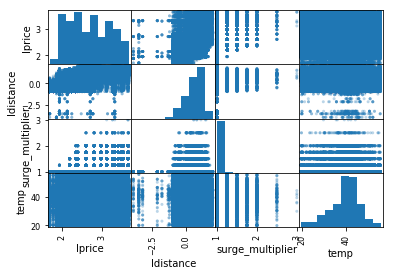

In [260]:
pd.plotting.scatter_matrix(merged_df[['lprice','ldistance', 'surge_multiplier', 'temp']], alpha = .3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9959bf4d30>,
      dtype=object)

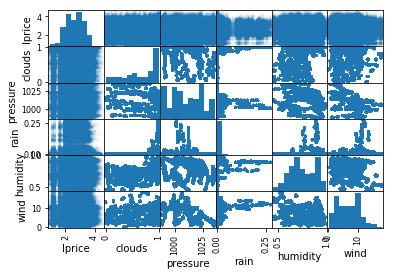

In [164]:
pd.plotting.scatter_matrix(merged_df[['lprice', 'clouds', 'pressure', 'rain', 'humidity', 'wind']], alpha = .05)

In [81]:
merged_df.corr()

,distance,price,surge_multiplier,temp,clouds,pressure,rain,humidity,wind,cab_type_Lyft,...,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
distance,1.000000,0.345082,0.025830,-0.003099,0.000342,0.003708,0.000789,-0.003740,-0.004251,-1.929998e-03,...,-0.000515,-0.000622,-0.000651,-0.000569,-0.000642,NaN,6.052217e-04,0.000524,0.000574,0.000577
price,0.345082,1.000000,0.240325,0.000005,0.001290,0.001012,0.000710,-0.001704,-0.001185,8.344084e-02,...,0.206547,0.500083,-0.219748,-0.039171,-0.333225,NaN,-2.569535e-01,-0.223527,-0.028578,-0.223570
surge_multiplier,0.025830,0.240325,1.000000,-0.001635,-0.001996,-0.002912,-0.001067,-0.001253,0.001286,1.637199e-01,...,0.068319,0.068519,0.071222,0.071166,-0.046650,NaN,-4.854270e-02,-0.048536,-0.048546,-0.048542
temp,-0.003099,0.000005,-0.001635,1.000000,0.437995,-0.377918,0.133400,0.366563,0.120664,1.926454e-03,...,-0.000582,0.001017,0.001175,0.001217,0.000318,NaN,-2.453412e-04,-0.002278,-0.001497,-0.000410
clouds,0.000342,0.001290,-0.001996,0.437995,1.000000,-0.210674,0.210941,0.509777,0.125876,-1.838530e-03,...,-0.001767,0.000983,-0.001790,0.001140,-0.000657,NaN,-9.199194e-04,0.000712,-0.000824,0.000376
pressure,0.003708,0.001012,-0.002912,-0.377918,-0.210674,1.000000,-0.069215,-0.132083,-0.569770,4.943372e-04,...,0.001093,0.001252,0.000350,-0.001506,-0.000845,NaN,1.021110e-04,0.000750,-0.000481,-0.000594
rain,0.000789,0.000710,-0.001067,0.133400,0.210941,-0.069215,1.000000,0.209892,0.218114,-3.075045e-03,...,-0.000867,-0.001492,-0.001808,-0.000359,-0.001892,NaN,1.424031e-03,0.000343,0.000167,-0.000426
humidity,-0.003740,-0.001704,-0.001253,0.366563,0.509777,-0.132083,0.209892,1.000000,-0.208435,-1.611857e-03,...,-0.000856,-0.000467,-0.001110,0.000948,-0.000815,NaN,3.347317e-04,0.000439,0.000012,0.000126
wind,-0.004251,-0.001185,0.001286,0.120664,0.125876,-0.569770,0.218114,-0.208435,1.000000,-4.234275e-03,...,-0.001954,-0.001899,-0.002297,0.000827,0.000135,NaN,1.390014e-03,0.001637,0.000142,0.000997
cab_type_Lyft,-0.001930,0.083441,0.163720,0.001926,-0.001839,0.000494,-0.003075,-0.001612,-0.004234,1.000000e+00,...,0.306438,0.306432,0.306396,0.306419,0.306386,NaN,-2.964984e-01,-0.296457,-0.296519,-0.296492


In [84]:
merged_df.columns

Index(['distance', 'price', 'surge_multiplier', 'merge_date', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'cab_type_Lyft', 'cab_type_Uber', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'source_Back Bay', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_

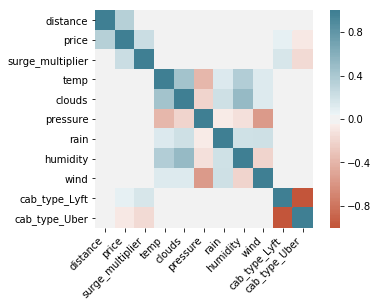

In [166]:
corr = merged_df[['distance', 'price', 'surge_multiplier', 'merge_date', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'cab_type_Lyft', 'cab_type_Uber']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

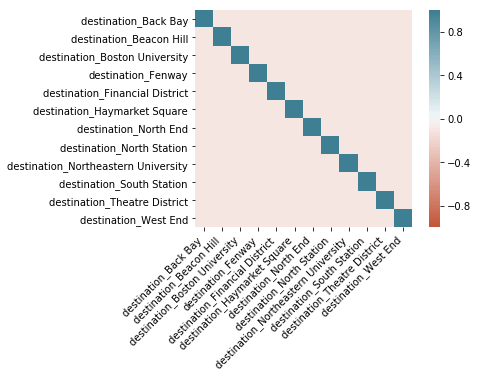

In [295]:
corr = merged_df[['destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

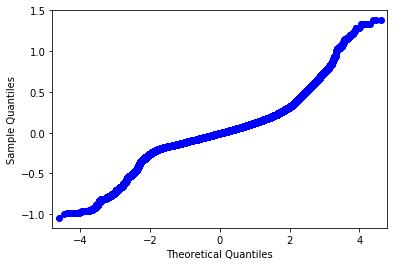

In [199]:
res = model.resid # residuals
fig = sm.qqplot(res)
plt.show()

In [368]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
#ax = plt.subplot(111)
lasso.fit(X_train, Y_train)
preds = lasso.predict(X_test)
lasso.coef_

/Users/ptw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ptw/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([ 0.00000000e+00,  8.97085447e-04,  4.38863885e-08, -1.11624554e-06,
        8.17065460e-09,  0.00000000e+00, -0.00000000e+00,  1.20506502e-07,
       -0.00000000e+00, -2.20873089e-05,  1.90211212e-05, -1.24947043e-05,
        1.02430572e-04, -3.03073656e-07, -2.64879228e-05,  5.74559532e-05,
        6.20083882e-06,  1.86036695e-05,  8.54601591e-06,  1.50150142e-05,
       -4.29394820e-05,  0.00000000e+00, -3.57659597e-06,  1.15818463e-04,
        2.68063045e-05,  5.57044887e-06,  2.94003925e-05, -1.94880534e-05,
       -0.00000000e+00,  4.32090162e-05,  1.25756789e-05,  3.98303941e-04,
        1.04811001e-03,  1.67943385e-04,  5.23149393e-04,  1.10597340e-03,
       -3.93688970e-04, -0.00000000e+00, -6.05676914e-04, -4.14247830e-04,
       -3.42998836e-04,  6.22564882e-05, -3.43228851e-04,  3.40481366e-04])

In [370]:
lasso.score(X_test, Y_test)

0.9214885411764883

In [371]:
lasso_res = Y_test - preds

ValueError: Unable to coerce to Series, length must be 1: given 120165

In [372]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, preds)

In [373]:
np.exp(mse)

1.0000000266611646

In [374]:
np.exp(Y_test).mean()

0    1.001152
dtype: float64

(array([1.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+01,
        6.8000e+01, 1.5100e+02, 1.8800e+02, 5.1800e+02, 9.2300e+02,
        1.9390e+03, 3.8770e+03, 7.1590e+03, 1.3667e+04, 1.9695e+04,
        1.9784e+04, 1.7571e+04, 1.1435e+04, 6.7770e+03, 4.3540e+03,
        3.7890e+03, 2.1270e+03, 1.6090e+03, 1.3120e+03, 9.4900e+02,
        7.3700e+02, 4.6100e+02, 2.9900e+02, 1.5300e+02, 1.1700e+02,
        1.0500e+02, 5.7000e+01, 4.5000e+01, 4.3000e+01, 2.7000e+01,
        3.8000e+01, 2.4000e+01, 1.8000e+01, 3.1000e+01, 2.0000e+01,
        1.0000e+01, 8.0000e+00, 8.0000e+00, 8.0000e+00, 1.1000e+01,
        4.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([-10.08220855,  -9.44456927,  -8.80692999,  -8.16929071,
         -7.53165143,  -6.89401215,  -6.25637287,  -5.61873359,
         -4.98109431,  -4.34345503,  -3.70581575,  -3.06817647,
         -2.43053718,  -1.7928979 ,  -1.15525862,  -0.51761934,
          0.12001994,   0.75765922,   1.3952985 ,   2.03293778

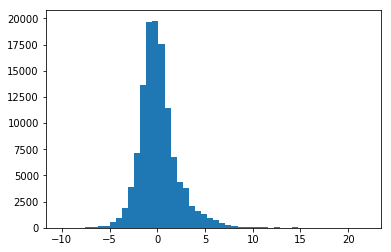

In [307]:
plt.hist(np.exp(Y_test) - np.exp(preds), bins=50)

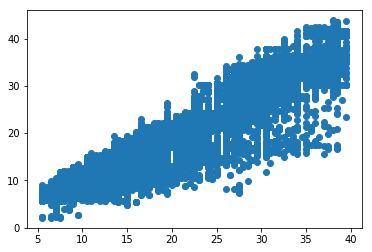

In [308]:
plt.scatter(np.exp(Y_test), np.exp(preds))

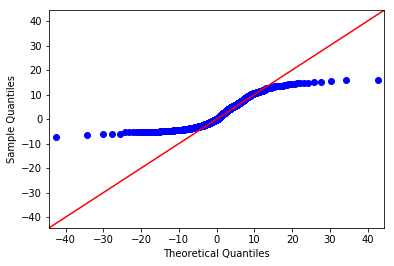

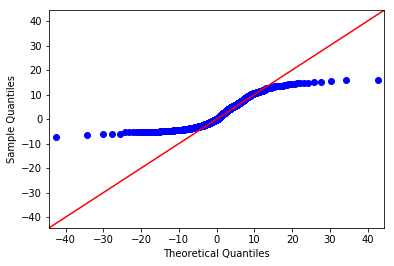

In [309]:
import scipy.stats as stats

sm.qqplot(lasso_res, stats.t, fit=True, line=str(45))

In [273]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()
#ax = plt.subplot(111)
ridge.fit(X_train, Y_train)
preds = ridge.predict(X_test)
ridge.coef_

array([ 0.00000000e+00,  6.81266105e-01,  6.39179434e-05, -1.18847675e-03,
        5.10221253e-06,  4.86695486e-03, -6.95429056e-04,  7.34719476e-05,
        2.30234612e-02, -2.30234612e-02, -2.29862715e-02, -3.14467330e-02,
        1.40088309e-02, -1.60111217e-02,  5.15279991e-02,  3.99587718e-04,
       -2.15697852e-02,  1.64797383e-02,  3.07786254e-03,  2.09084775e-02,
       -4.13042544e-03, -1.02581592e-02, -1.89048461e-02, -4.74413984e-02,
       -1.10294922e-02, -9.33466587e-03,  5.91119101e-02,  2.20536211e-02,
        1.18118333e-02, -2.30114998e-03, -2.01368375e-02,  5.82168939e-03,
        2.05512033e-02, -1.02018672e-02,  3.64958346e-01,  7.67232004e-01,
        1.30448803e-01,  3.96011701e-01,  7.45606842e-01, -4.73729041e-01,
       -1.83103707e-02, -7.57004474e-01,  0.00000000e+00, -4.83871306e-01,
       -3.77948655e-01,  8.47565380e-02, -3.78150387e-01,  3.12908136e-01])

In [274]:
ridge.score(X_test, Y_test)

0.9349821436446604

In [275]:
ridge_res = np.exp(Y_test) - np.exp(preds)

In [276]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, preds)

In [277]:
np.exp(mse)

1.0166239593425062

In [278]:
np.exp(Y_test).mean()

16.5959239379187

(array([1.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 1.7000e+01,
        3.7000e+01, 9.7000e+01, 1.8500e+02, 3.0500e+02, 6.1400e+02,
        1.2260e+03, 2.6050e+03, 4.8570e+03, 9.3010e+03, 1.6813e+04,
        2.0730e+04, 1.9573e+04, 1.4956e+04, 9.2070e+03, 5.6620e+03,
        4.3370e+03, 2.6210e+03, 1.9500e+03, 1.4550e+03, 1.0580e+03,
        8.1800e+02, 5.1100e+02, 3.5400e+02, 2.2200e+02, 1.4300e+02,
        1.1500e+02, 6.7000e+01, 4.7000e+01, 4.8000e+01, 2.7000e+01,
        3.6000e+01, 3.2000e+01, 1.9000e+01, 2.6000e+01, 2.2000e+01,
        1.4000e+01, 7.0000e+00, 6.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([-10.61479051,  -9.96696403,  -9.31913755,  -8.67131107,
         -8.0234846 ,  -7.37565812,  -6.72783164,  -6.08000517,
         -5.43217869,  -4.78435221,  -4.13652573,  -3.48869926,
         -2.84087278,  -2.1930463 ,  -1.54521982,  -0.89739335,
         -0.24956687,   0.39825961,   1.04608609,   1.69391256

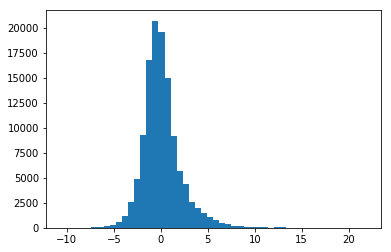

In [279]:
plt.hist(np.exp(Y_test) - np.exp(preds), bins=50)

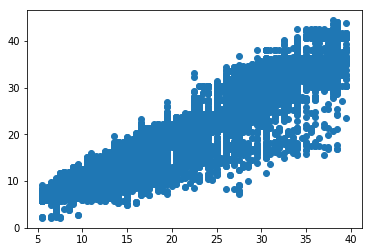

In [280]:
plt.scatter(np.exp(Y_test), np.exp(preds))

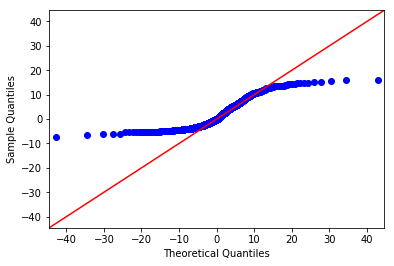

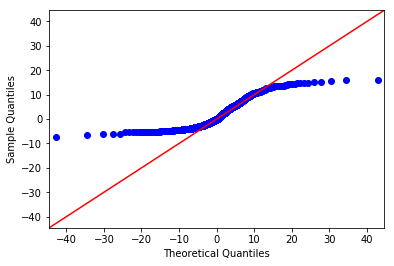

In [281]:
import scipy.stats as stats

sm.qqplot(lasso_res, stats.t, fit=True, line=str(45))

## Notes

In [178]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
embeded_lr_selector = SelectFromModel(LassoCV(), max_features=20)
embeded_lr_selector.fit(X_train, Y_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_train.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

/Users/ptw/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


20 selected features


In [179]:
embeded_lr_feature

['surge_multiplier',
 'destination_Beacon Hill',
 'destination_Financial District',
 'destination_North End',
 'destination_North Station',
 'source_Beacon Hill',
 'source_Financial District',
 'source_Theatre District',
 'name_Black',
 'name_Black SUV',
 'name_Lux',
 'name_Lux Black',
 'name_Lux Black XL',
 'name_Lyft',
 'name_Shared',
 'name_UberPool',
 'name_UberX',
 'name_UberXL',
 'name_WAV',
 'ldistance']

In [376]:
dataSet_df = merged_df[['distance', 'surge_multiplier', 'temp', 'clouds', 'pressure', 
                        'rain', 'humidity', 'wind', 'name_Black', 'name_Black SUV', 
                        'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 
                        'name_Lyft XL', 'name_Shared', 'name_Taxi', 'name_UberPool', 'name_UberX', 
                        'name_UberXL', 'name_WAV', 'destination_Back Bay', 'destination_Beacon Hill', 
                        'destination_Boston University', 'destination_Fenway', 'destination_Financial District',
                        'destination_Haymarket Square', 'destination_North End', 'destination_North Station', 
                        'destination_Northeastern University', 'destination_South Station', 
                        'destination_Theatre District', 'destination_West End', 'source_Back Bay', 
                        'source_Beacon Hill', 'source_Boston University', 'source_Fenway',
                        'source_Financial District', 'source_Haymarket Square',
                        'source_North End', 'source_North Station',
                        'source_Northeastern University', 'source_South Station',
                         'source_Theatre District', 'source_West End','price']]

In [377]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [378]:
XX= dataSet_df[['distance', 'surge_multiplier', 'temp', 'clouds', 'pressure', 
                        'rain', 'humidity', 'wind', 'name_Black', 'name_Black SUV', 
                        'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 
                        'name_Lyft XL', 'name_Shared', 'name_Taxi', 'name_UberPool', 'name_UberX', 
                        'name_UberXL', 'name_WAV', 'destination_Back Bay', 'destination_Beacon Hill', 
                        'destination_Boston University', 'destination_Fenway', 'destination_Financial District',
                        'destination_Haymarket Square', 'destination_North End', 'destination_North Station', 
                        'destination_Northeastern University', 'destination_South Station', 
                        'destination_Theatre District', 'destination_West End', 'source_Back Bay', 
                        'source_Beacon Hill', 'source_Boston University', 'source_Fenway',
                        'source_Financial District', 'source_Haymarket Square',
                        'source_North End', 'source_North Station',
                        'source_Northeastern University', 'source_South Station',
                         'source_Theatre District', 'source_West End']]
YY = dataSet_df['price']

In [379]:
X_train, X_test, y_train, y_test = train_test_split(XX.values, YY.values, test_size=0.33, random_state=42)

In [380]:
y_train.shape

(402552,)

In [381]:
regr = RandomForestRegressor(max_depth=4, random_state=137, n_estimators=1000)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=137, verbose=0, warm_start=False)

In [382]:
y_rf = regr.predict(X_test)

In [387]:
fimpDict = {}
for fimp in list(zip(XX.columns, regr.feature_importances_)):
    print(fimp)
    fimpDict.update({fimp[0]:fimp[1]})

('distance', 0.05951465433242029)
('surge_multiplier', 0.0025734811712555925)
('temp', 0.0)
('clouds', 0.0)
('pressure', 0.0)
('rain', 0.0)
('humidity', 0.0)
('wind', 0.0)
('name_Black', 0.1128144317338077)
('name_Black SUV', 0.33530052147261763)
('name_Lux', 0.0)
('name_Lux Black', 0.13720841559892896)
('name_Lux Black XL', 0.35236411865261175)
('name_Lyft', 0.0)
('name_Lyft XL', 0.0)
('name_Shared', 0.0)
('name_Taxi', 0.0)
('name_UberPool', 0.0)
('name_UberX', 0.0)
('name_UberXL', 0.0)
('name_WAV', 0.0)
('destination_Back Bay', 2.6610882907826793e-05)
('destination_Beacon Hill', 0.0)
('destination_Boston University', 0.0)
('destination_Fenway', 0.0)
('destination_Financial District', 0.0)
('destination_Haymarket Square', 2.962013986479391e-05)
('destination_North End', 0.0)
('destination_North Station', 0.0)
('destination_Northeastern University', 2.7743108181722483e-06)
('destination_South Station', 0.0)
('destination_Theatre District', 0.0)
('destination_West End', 0.0)
('source_Ba

In [405]:
kk = list(fimpDict.keys())
vv = list(fimpDict.values())


fimpDF = pd.DataFrame({'features':kk,
                      'importance':vv})









In [407]:
fimpDF.sort_values(by='importance')

,features,importance
22,destination_Beacon Hill,0.000000
23,destination_Boston University,0.000000
24,destination_Fenway,0.000000
25,destination_Financial District,0.000000
27,destination_North End,0.000000
28,destination_North Station,0.000000
30,destination_South Station,0.000000
31,destination_Theatre District,0.000000
43,source_Theatre District,0.000000
32,destination_West End,0.000000


(array([6.0000e+01, 9.8800e+02, 3.8780e+03, 1.7845e+04, 1.5703e+04,
        7.4790e+03, 1.9535e+04, 1.0448e+04, 1.8532e+04, 1.8007e+04,
        1.0067e+04, 9.6680e+03, 1.6330e+04, 5.4980e+03, 4.9110e+03,
        3.7770e+03, 2.5430e+03, 1.1524e+04, 2.2510e+03, 1.9830e+03,
        1.0200e+03, 5.8430e+03, 8.7200e+02, 3.9300e+02, 6.4000e+02,
        4.0950e+03, 4.2000e+02, 5.9100e+02, 7.8000e+01, 2.7500e+02,
        9.7400e+02, 9.4000e+01, 8.8100e+02, 4.4000e+01, 9.4000e+01,
        9.6000e+01, 2.3100e+02, 7.7000e+01, 5.9000e+01, 1.7700e+02,
        1.6000e+01, 8.0000e+00, 1.0300e+02, 1.4000e+01, 1.3000e+01,
        3.0000e+00, 4.0000e+00, 4.4000e+01, 8.3000e+01, 4.0000e+00]),
 array([-7.35619088, -6.65878774, -5.96138461, -5.26398147, -4.56657834,
        -3.8691752 , -3.17177207, -2.47436893, -1.7769658 , -1.07956266,
        -0.38215953,  0.3152436 ,  1.01264674,  1.71004987,  2.40745301,
         3.10485614,  3.80225928,  4.49966241,  5.19706555,  5.89446868,
         6.59187182,  7.28

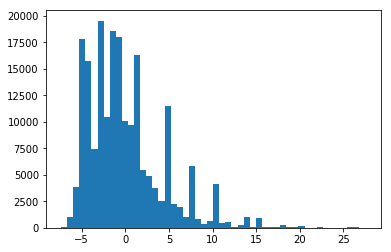

In [384]:
plt.hist(y_test-y_rf, bins=50)

In [408]:
regr2 = RandomForestRegressor(max_depth=5, random_state=137, n_estimators=2000)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
           oob_score=False, random_state=137, verbose=0, warm_start=False)

In [409]:
fimpDict2 = {}
for fimp in list(zip(XX.columns, regr2.feature_importances_)):
    print(fimp)
    fimpDict2.update({fimp[0]:fimp[1]})

('distance', 0.08411159554577159)
('surge_multiplier', 0.004798135772894215)
('temp', 4.058997336139654e-08)
('clouds', 1.3079708087929082e-07)
('pressure', 2.559713669665222e-07)
('rain', 5.058205400501373e-08)
('humidity', 4.494692498683774e-07)
('wind', 8.703892792528805e-08)
('name_Black', 0.10285456211881895)
('name_Black SUV', 0.30573628116164037)
('name_Lux', 0.055831286838348856)
('name_Lux Black', 0.12507198862350913)
('name_Lux Black XL', 0.32110437716214707)
('name_Lyft', 0.0)
('name_Lyft XL', 0.0)
('name_Shared', 0.0)
('name_Taxi', 0.0)
('name_UberPool', 0.0)
('name_UberX', 0.0)
('name_UberXL', 0.0)
('name_WAV', 0.0)
('destination_Back Bay', 0.00014439988558463074)
('destination_Beacon Hill', 1.8422604099186783e-10)
('destination_Boston University', 1.0964727054163061e-09)
('destination_Fenway', 9.071226103555381e-07)
('destination_Financial District', 6.982415602747525e-06)
('destination_Haymarket Square', 4.232965322789462e-05)
('destination_North End', 1.6964724484275228

In [410]:
kk = list(fimpDict.keys())
vv = list(fimpDict.values())


fimpDF = pd.DataFrame({'features':kk,
                      'importance':vv})

In [411]:
fimpDF.sort_values(by='importance')

,features,importance
22,destination_Beacon Hill,0.000000
23,destination_Boston University,0.000000
24,destination_Fenway,0.000000
25,destination_Financial District,0.000000
27,destination_North End,0.000000
28,destination_North Station,0.000000
30,destination_South Station,0.000000
31,destination_Theatre District,0.000000
43,source_Theatre District,0.000000
32,destination_West End,0.000000
